<a href="https://colab.research.google.com/github/IgnacioPerez98/AlgebraMatrices/blob/Repositorios/Proyecto2_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerias de Python necesarias
import numpy as np
from skimage.io import imshow, imread
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def recortar_imagen_v2(ruta_img: str, ruta_img_crop: str, x_inicial: int, x_final: int, y_inicial: int, y_final: int)-> None:
    """
    Esta función recibe una imagen y devuelve otra imagen recortada.

    Args:
      ruta_img (str): Ruta de la imagen original que se desea recortar.
      ruta_img_crop (str): Ruta donde se guardará la imagen recortada.
      x_inicial (int): Coordenada x inicial del área de recorte.
      x_final (int): Coordenada x final del área de recorte.
      y_inicial (int): Coordenada y inicial del área de recorte.
      y_final (int): Coordenada y final del área de recorte.

    Return
      None
    """
    try:
        # Abrir la imagen
        image = cv2.imread(ruta_img,cv2.IMREAD_COLOR)

        # Obtener la imagen recortada
        image_crop = image[x_inicial:x_final, y_inicial:y_final]

        # Guardar la imagen recortada en la ruta indicada
        cv2.imwrite(ruta_img_crop, image_crop)

        print("Imagen recortada con éxito. El tamaño de la imagen es de" + str(image_crop.shape))
    except Exception as e:
        print("Ha ocurrido un error:", str(e))



In [ ]:
# Monta tu Google Drive a la máquina virtual de Colab.
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Cambiar el directorio actual al directorio donde se encuentra la tarea.
# Especificar la ruta donde se van a guardar los archivos que pide la tarea.
# Por ejemplo: '/content/drive/My Drive/Algebra Aplicada UCU'
os.chdir('/content/drive/My Drive/Colab Notebooks/Algebra') #Modificar esta línea
#!ls /content/drive/My\ Drive/Colab\ Notebooks

Mounted at /content/drive/


Imagen recortada con éxito. El tamaño de la imagen es de(1367, 1367, 3)


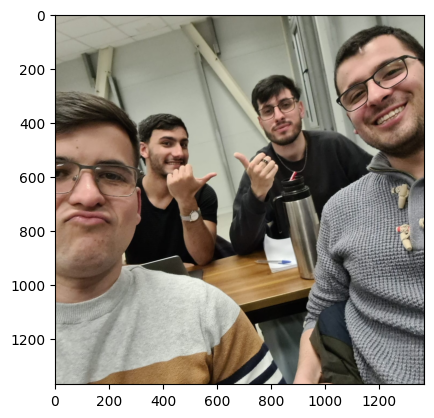

In [ ]:

# Recortar imagen: Es importante recortar las imagenes con el mismo ancho y largo para poder realizar operaciones con ellas,
# por ejemplo la suma de matrices.
recortar_imagen_v2('/content/drive/My Drive/Colab Notebooks/Algebra/foto_nosotros.jpeg','/content/drive/My Drive/Colab Notebooks/Algebra/foto_nosotrosEdited.jpeg', 1,1368, 1, 1368 )
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/Algebra/foto_nosotrosEdited.jpeg', cv2.IMREAD_COLOR)

#Imprimir imagen
#cv2_imshow(image)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)

In [ ]:
#Imprimir largo de imagen
len(image)

1367

In [ ]:
#Imprimir tamaño de la imagen. Largo, Ancho, Canales
image.shape


(1367, 1367, 3)

In [ ]:
#Imprimir como matriz:
image

array([[[165, 180, 182],
        [165, 180, 182],
        [165, 180, 182],
        ...,
        [166, 177, 174],
        [166, 177, 174],
        [166, 177, 174]],

       [[165, 180, 182],
        [165, 180, 182],
        [165, 180, 182],
        ...,
        [166, 177, 174],
        [166, 177, 174],
        [166, 177, 174]],

       [[165, 180, 182],
        [165, 180, 182],
        [165, 180, 182],
        ...,
        [166, 177, 174],
        [166, 177, 174],
        [166, 177, 174]],

       ...,

       [[190, 197, 194],
        [191, 198, 195],
        [191, 198, 195],
        ...,
        [138, 134, 133],
        [150, 146, 145],
        [152, 148, 147]],

       [[185, 192, 189],
        [185, 192, 189],
        [182, 189, 186],
        ...,
        [133, 129, 128],
        [136, 132, 131],
        [132, 128, 127]],

       [[180, 187, 184],
        [182, 189, 186],
        [178, 185, 182],
        ...,
        [131, 127, 126],
        [135, 131, 130],
        [129, 125, 124]]

image shape: (1367, 1367, 3), transposed shape: (1367, 1367, 3)


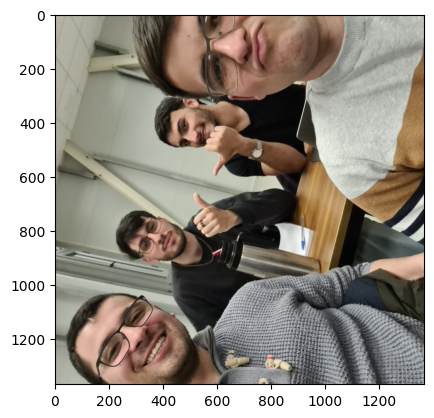

In [ ]:
#from PIL import Image

# Calcular transpuesta de las imagenes
#matriz_transpuesta = image.transpose()
#prueba = (image.shape[1], image.shape[0],image.shape[2])
#matriz_transpuesta
#matriz_transpuesta.shape
transposed = RGB_image.transpose(1,0,2)
print(f"image shape: {RGB_image.shape}, transposed shape: {transposed.shape}")

#swapped_image = image.transpose(1,0,2)
#swapped_image.shape
plt.imshow(transposed)

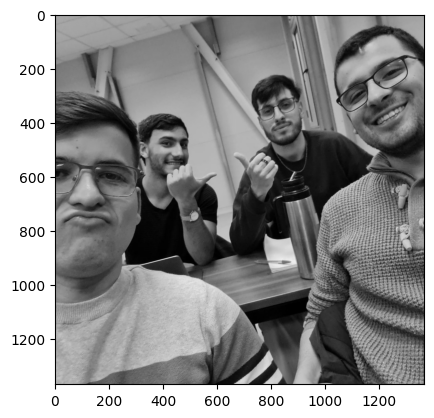

In [ ]:
#Convertir a escala de grises

(row, col) = RGB_image.shape[0:2]

for i in range(row):
    for j in range(col):
        RGB_image[i, j] = sum(RGB_image[i, j]) * 0.33

plt.imshow(RGB_image)

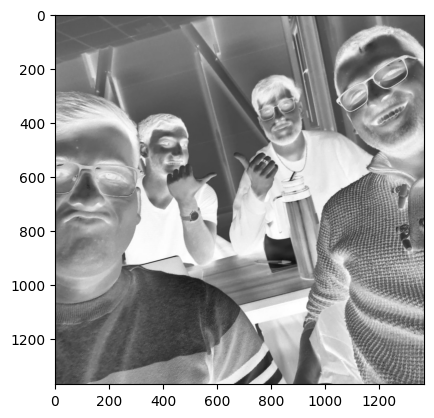

In [ ]:
# Calcular la inversa de las imagenes

inversa = RGB_image.copy()
(row,col) = inversa.shape[0:2]

for i in range(row):
  for j in range(col):
    inversa[i,j] = 255 - inversa[i,j]


plt.imshow(inversa)

# Ejercicio 8. Producto por escalares




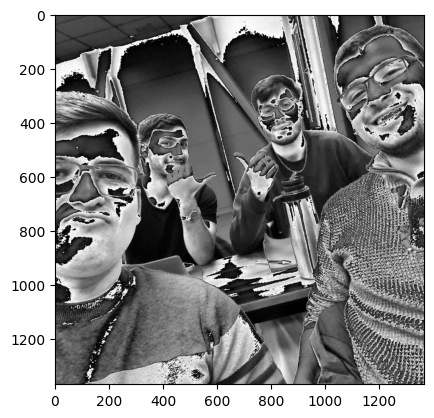

In [ ]:

# Caso escalar > 1
caso1 = RGB_image.copy()
alpha = 2
caso1 = caso1*alpha
np.clip(caso1,0,255)

plt.imshow(caso1)


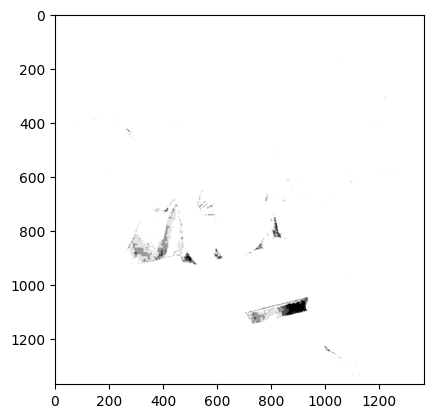

In [ ]:
# Caso escalar 0 > alpha < 1
caso2 = RGB_image.copy()
alpha = 0.3
caso2 = caso2*alpha
np.clip(caso2,0,255)
plt.imshow(caso2)

# Ejercicio 9. Multiplicación entre matrices


In [ ]:
# Generar matriz identidad del mismo tamaño que la imagen
identidad =np.eye(len(RGB_image))

# Generar matriz anti identidad (W):
W= np.fliplr(identidad)
W

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

(<matplotlib.image.AxesImage at 0x78d1504fe800>,
 <matplotlib.image.AxesImage at 0x78d15050b580>)

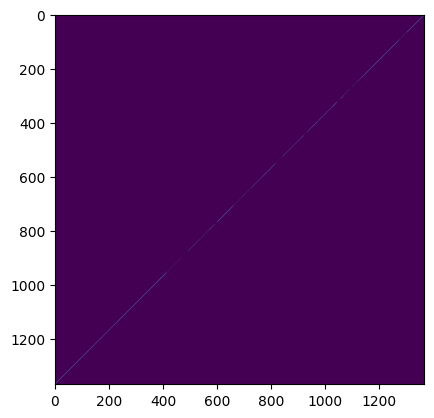

In [ ]:
# Aplicar la multiplicacion de matrices
imagen_2d = np.mean(RGB_image, axis=2)

caso1 = imagen_2d*W
caso2 = W *imagen_2d